In [1]:
import numpy as np
import nibabel as nib
from scipy.stats import pearsonr
from sklearn.decomposition import FastICA
%pylab inline
from sklearn.linear_model import LinearRegression

C:\Users\Lixuan\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
results = dict()
for i in range(1, 11):
    results[i] = nib.load('{}_regre.nii.gz'.format(i))

In [3]:
x, y, z, ic = results[1].shape

for i in range(1, 11):
    results[i] = results[i].get_data().reshape(x*y*z, ic)

In [4]:
group_matrix = np.concatenate(list(results.values()), axis=-1)

In [5]:
group_matrix.shape

(165888, 50)

In [6]:
columns = []
for i in range(10):
    for j in range(5):
        columns.append('sub{}-{}'.format(str(i+1).zfill(2), j+1))

In [7]:
import pandas as pd
df = pd.DataFrame(group_matrix, columns=columns)

In [8]:
corr_of_ICs = df.corr()

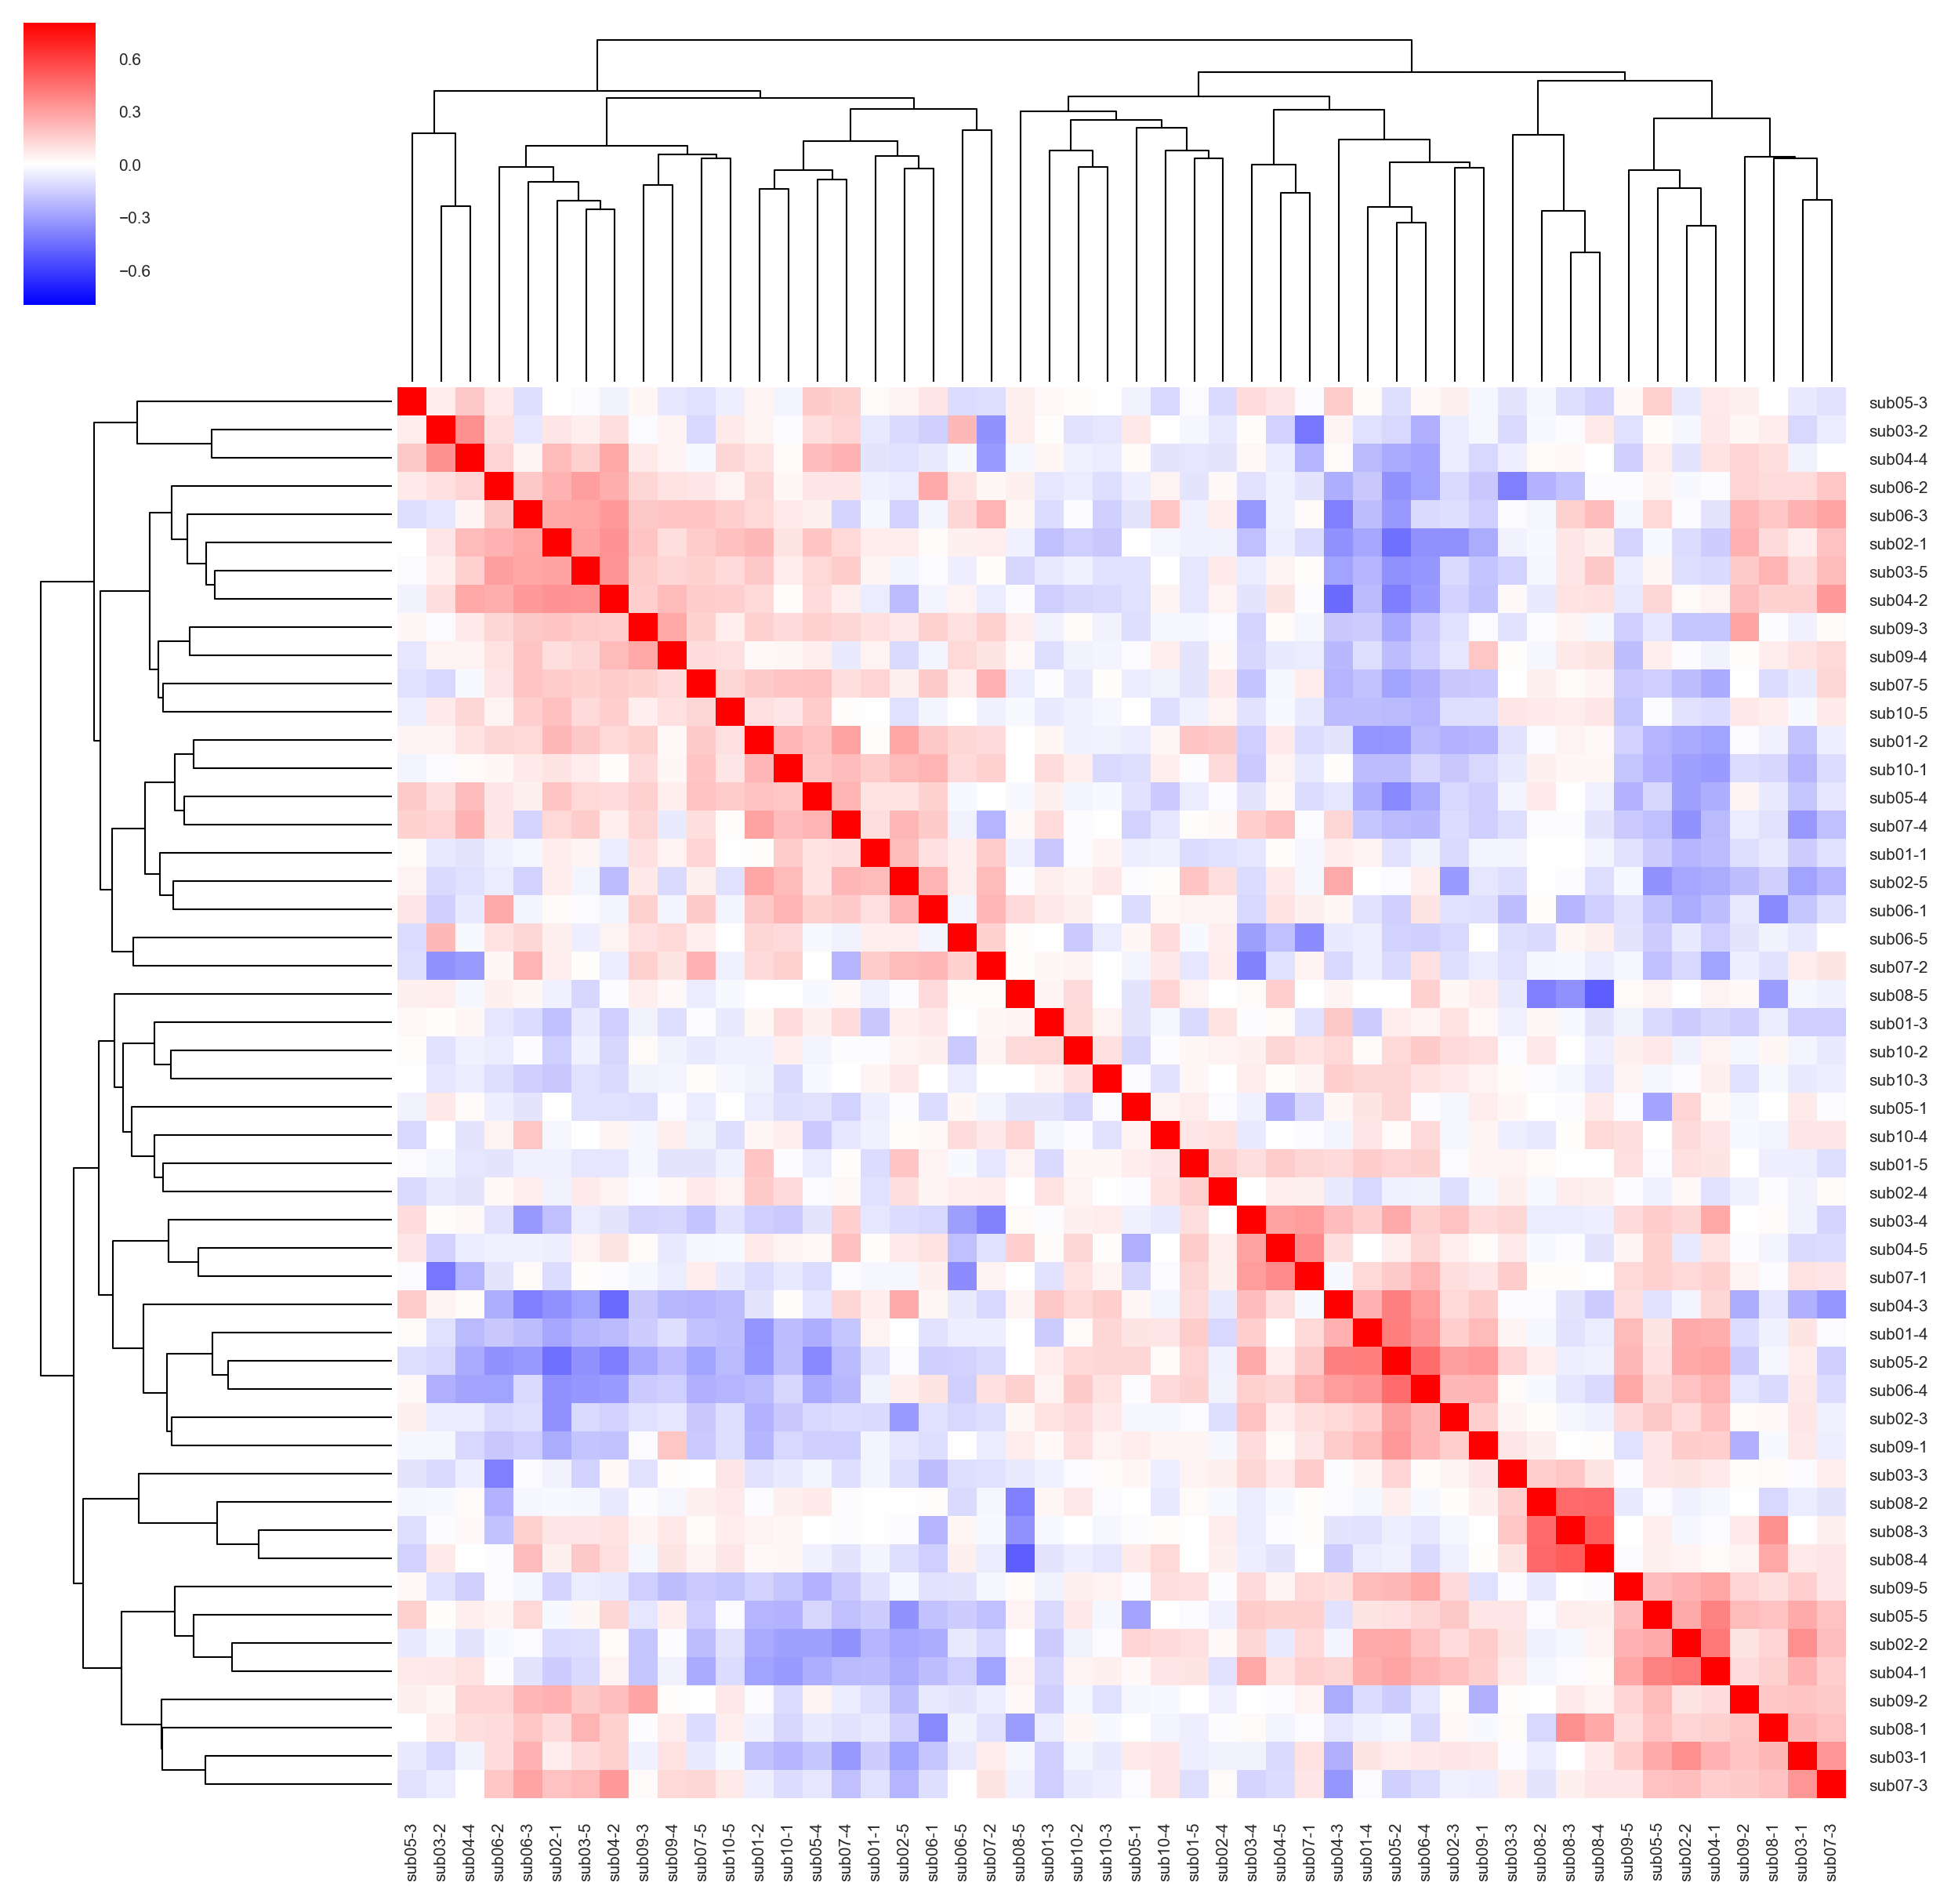

In [9]:
import seaborn as sns
mpl.rcParams['figure.figsize'] = [15, 15]
mpl.rcParams['figure.dpi'] = 300
sns.set(font_scale=0.5)
a = sns.clustermap(corr_of_ICs, vmin=-0.8, vmax=0.8, cmap='bwr')